## Regression with smf.ols

In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import matplotlib.pyplot as plt
import seaborn

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
botsvana_data = pd.read_csv('./botswana.tsv', sep='\t')

In [4]:
botsvana_data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


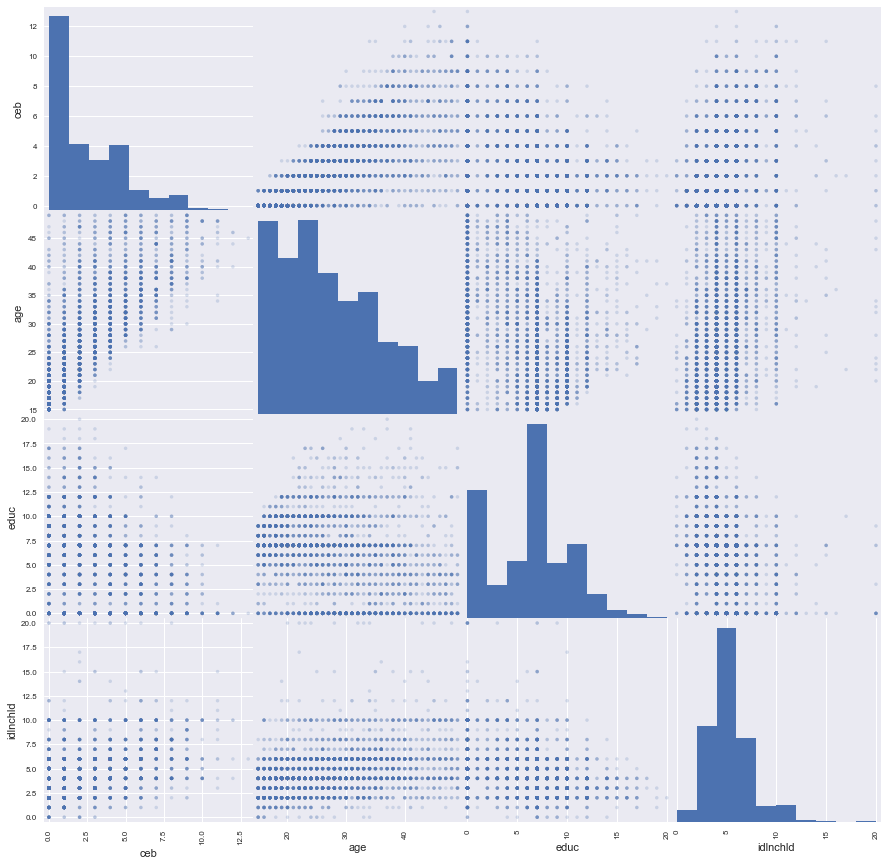

In [5]:
pd.plotting.scatter_matrix(botsvana_data[['ceb', 'age', 'educ', 'idlnchld']], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

О каждой из них мы знаем:

- сколько детей она родила (признак ceb)
- возраст (age)
- длительность получения образования (educ)
- религиозная принадлежность (religion)
- идеальное, по её мнению, количество детей в семье (idlnchld)
- была ли она когда-нибудь замужем (evermarr)
- возраст первого замужества (agefm)
- длительность получения образования мужем (heduc)
- знает ли она о методах контрацепции (knowmeth)
- использует ли она методы контрацепции (usemeth)
- живёт ли она в городе (urban)
- есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

Давайте научимся оценивать количество детей ceb по остальным признакам.

Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

#### Task 1

In [6]:
np.unique(botsvana_data['religion'])

array(['catholic', 'other', 'protestant', 'spirit'], dtype=object)

#### Task 2

In [7]:
botsvana_data.dropna().shape[0]

1834

#### Task 3

In [8]:
botsvana_data['nevermarr'] = botsvana_data['agefm'].apply(lambda x : 1 if str(x) == 'nan' else 0)
botsvana_data['agefm'] = botsvana_data['agefm'].apply(lambda x : 0 if str(x) == 'nan' else x)
botsvana_data.loc[botsvana_data.nevermarr == 1, 'heduc'] = -1
botsvana_data.drop('evermarr', axis=1, inplace=True)

In [9]:
botsvana_data[np.isnan(botsvana_data['heduc'])].shape[0]

123

#### Task 4

In [10]:
botsvana_data['idlnchld_noans'] = botsvana_data['idlnchld'].apply(lambda x : 1 if str(x) == 'nan' else 0)
botsvana_data['usemeth_noans'] = botsvana_data['usemeth'].apply(lambda x : 1 if str(x) == 'nan' else 0)
botsvana_data['heduc_noans'] = botsvana_data['heduc'].apply(lambda x : 1 if str(x) == 'nan' else 0)
botsvana_data['idlnchld'] = botsvana_data['idlnchld'].apply(lambda x : -1 if str(x) == 'nan' else x)
botsvana_data['usemeth'] = botsvana_data['usemeth'].apply(lambda x : -1 if str(x) == 'nan' else x)
botsvana_data['heduc'] = botsvana_data['heduc'].apply(lambda x : -2 if str(x) == 'nan' else x)

In [11]:
botsvana_data.shape # knowmeth, electric, radio, tv и bicycle

(4361, 18)

In [12]:
botsvana_data.dropna(inplace=True)

In [14]:
botsvana_data.shape[0] * botsvana_data.shape[1]

78264

#### Task 5

In [15]:
data = botsvana_data

In [16]:
' + '.join(data.columns[1:])

'age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + usemeth_noans + heduc_noans'

In [17]:
m1 = smf.ols('ceb ~ ' + ' + '.join(data.columns[1:]), data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sun, 03 Sep 2017   Prob (F-statistic):               0.00
Time:                        13:43:00   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [18]:
print(fitted.rsquared)

0.64421383262


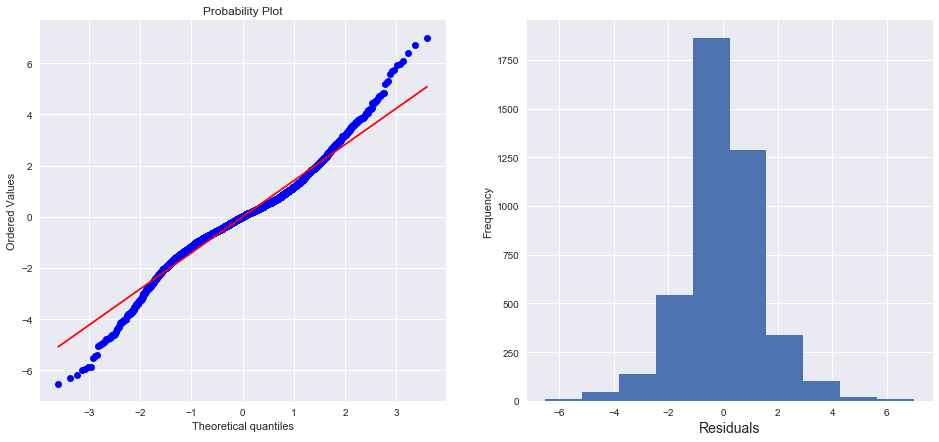

In [19]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

#### Task 7

In [20]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


#### Task 8

In [21]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
            'agefm + heduc + urban + electric + bicycle +'\
            'nevermarr + idlnchld_noans + usemeth_noans + heduc_noans', 
             data=data)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 03 Sep 2017   Prob (F-statistic):               0.00
Time:                        13:43:05   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [23]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


#### Task 9

In [258]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
            'agefm + heduc + urban + electric + bicycle +'\
            'nevermarr + idlnchld_noans + heduc_noans', 
             data=data)
fitted = m3.fit(cov_type='HC1')
#print fitted.summary()

In [275]:
print("F=%f, p=%.40f, k1=%f" % m2.fit().compare_f_test(m3.fit()))

F=92.915245, p=0.0000000000000000000000000000000000000003, k1=2.000000


#### Task 10